<a href="https://colab.research.google.com/github/Piyush-1806/EconoPhysics/blob/main/TataSteel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

# Download Nifty 50 data (NSE symbol for Nifty 50 is ^NSEI)
nifty50_data = yf.download('TATASTEEL.NS', start='2020-01-01', end='2024-09-30')

# Save to Excel
nifty50_data.to_excel('TATASTEEL.NS_Historical_Data.xlsx')


[*********************100%***********************]  1 of 1 completed


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from google.colab import files

In [ ]:
data = files.upload()

Saving TATASTEEL.NS_Historical_Data.xlsx to TATASTEEL.NS_Historical_Data (1).xlsx


In [ ]:
path = r'/content/TATASTEEL.NS_Historical_Data (1).xlsx'
df = pd.read_excel('TATASTEEL.NS_Historical_Data.xlsx', usecols="B", skiprows=1, nrows=1176)

In [ ]:
# Convert the data to a NumPy array and reshape it into a 1D array
data_array = np.array(df)
data_1d = np.reshape(data_array, (data_array.shape[0] * data_array.shape[1]))

In [ ]:
# Define time (days) array, assuming each row is one day in order
t = np.arange(len(data_1d))  # Time in days
P = data_1d  # Stock prices (1D array)

# Define the LPPL function
def lppl(t, A, B, tc, beta, C, omega, phi):
    return A + B * (tc - t)**beta * (1 + C * np.cos(omega * np.log(tc - t) + phi))

# Initial guess for the parameters
initial_guess = [P[-1], -1, t[-1] + 100, 0.5, 0.1, 6, 1]

# Fit the LPPL model to the stock price data
try:
    params, covariance = curve_fit(lppl, t, P, p0=initial_guess, maxfev=20000)

    # Extract the fitted parameters
    A, B, tc, beta, C, omega, phi = params

    # Generate fitted values using the LPPL model
    fitted_prices = lppl(t, *params)

    # Plot the actual vs fitted prices
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, label='Actual Prices', color='blue')
    plt.plot(t, fitted_prices, label='LPPL Fitted Prices', color='red', linestyle='--')
    plt.axvline(x=tc, color='black', linestyle=':', label=f'Predicted Crash Time (tc): {tc}')
    plt.title('Stock Price vs LPPL Fitted Prices')
    plt.xlabel('Time (Days)')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Print the estimated time of crash
    print(f"Estimated time of crash (tc): {tc}")

except RuntimeError as e:
    print(f"Error fitting LPPL: {e}")

<ipython-input-13-a7bf254a7f58>:7: RuntimeWarning: invalid value encountered in power
  return A + B * (tc - t)**beta * (1 + C * np.cos(omega * np.log(tc - t) + phi))
<ipython-input-13-a7bf254a7f58>:7: RuntimeWarning: invalid value encountered in log
  return A + B * (tc - t)**beta * (1 + C * np.cos(omega * np.log(tc - t) + phi))


Error fitting LPPL: Optimal parameters not found: Number of calls to function has reached maxfev = 20000.


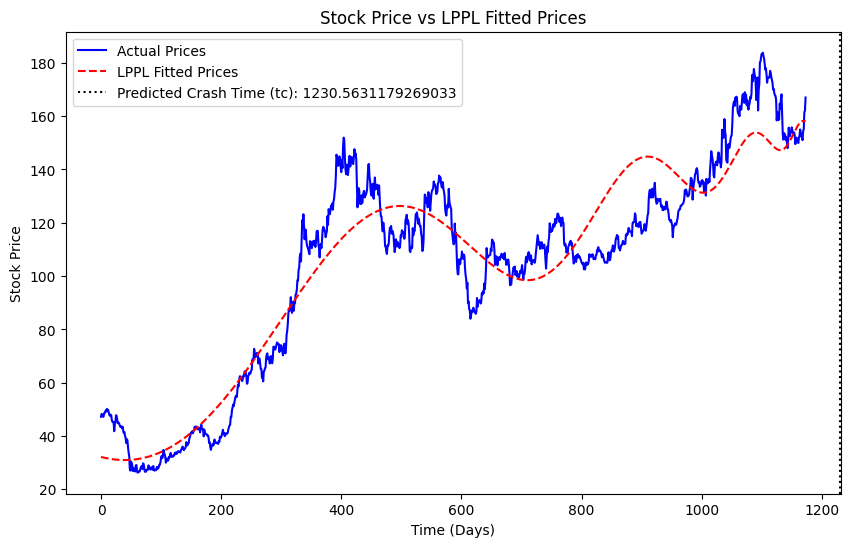

R² score: 0.8859756891850602
Mean Squared Error: 183.8513738690436


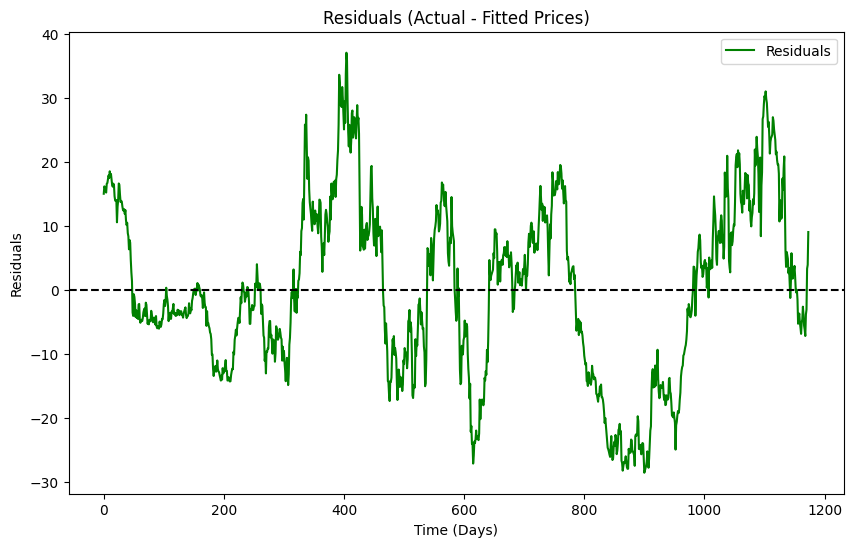

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Assuming your stock price data is in data_1d and time array is t

# LPPL function definition
def lppl(t, A, B, tc, beta, C, omega, phi):
    # Add a small epsilon to avoid log and power issues
    epsilon = 1e-6
    return A + B * (np.abs(tc - t) + epsilon)**beta * (1 + C * np.cos(omega * np.log(np.abs(tc - t) + epsilon) + phi))

# Revised initial guesses for the parameters
A_guess = 150  # Mid-point of the stock price range (100-200)
B_guess = -30  # Negative trend as the market might be in a downturn
tc_guess = t[-1] + 100  # Predicting crash to happen ~100 days beyond the last day
beta_guess = 0.5  # Common range between 0 and 1
C_guess = 0.1  # Small oscillations
omega_guess = 7  # Slightly higher frequency
phi_guess = 0  # Initial phase

initial_guess = [A_guess, B_guess, tc_guess, beta_guess, C_guess, omega_guess, phi_guess]

# Set parameter bounds
bounds = ([100, -np.inf, t[-1] + 1, 0, 0, 0, -np.pi],  # Lower bounds
          [200, np.inf, t[-1] + 500, 1, 1, 10, np.pi])  # Upper bounds

# Fit the LPPL model to the stock price data
try:
    params, covariance = curve_fit(lppl, t, data_1d, p0=initial_guess, bounds=bounds, maxfev=20000)

    # Extract the fitted parameters
    A, B, tc, beta, C, omega, phi = params

    # Generate fitted values using the LPPL model
    fitted_prices = lppl(t, *params)

    # Plot the actual vs fitted prices
    plt.figure(figsize=(10, 6))
    plt.plot(t, data_1d, label='Actual Prices', color='blue')
    plt.plot(t, fitted_prices, label='LPPL Fitted Prices', color='red', linestyle='--')
    plt.axvline(x=tc, color='black', linestyle=':', label=f'Predicted Crash Time (tc): {tc}')
    plt.title('Stock Price vs LPPL Fitted Prices')
    plt.xlabel('Time (Days)')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Calculate R² score
    r2 = r2_score(data_1d, fitted_prices)
    print(f"R² score: {r2}")

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(data_1d, fitted_prices)
    print(f"Mean Squared Error: {mse}")

    # Plot residuals
    residuals = data_1d - fitted_prices
    plt.figure(figsize=(10, 6))
    plt.plot(t, residuals, label='Residuals', color='green')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residuals (Actual - Fitted Prices)')
    plt.xlabel('Time (Days)')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

except RuntimeError as e:
    print(f"Error fitting LPPL: {e}")
